## 必要なモジュールをインポート

In [31]:
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image

import math

## 必要な関数を作成

In [151]:
def fx(x1, x2, x, img): # 座標(x1, 0),(x2, img.shape[0])の2点を通る直線の式における、xがx(引数)の時のyを返す
    y = img.shape[0] // (x2 - x1) * (x - x1)
    return y
    
def directionClassify(x1, x2, x, y, img_path): # 方向分類
    img = cv2.imread(img_path)
    img = cv2.resize(img,(300,300)) 
    
    img_width = 300
    
    
    x1 = x1 * img.shape[1] // img_width
    x2 = x2 * img.shape[1] // img_width
    
    mid_x = img.shape[1] // 2
    new_x1 = 2 * mid_x - x1
    new_x2 = 2 * mid_x - x2
    
    if x1 < x2:
        if (x == x1 and y == 0) or (x == new_x1 and y == 0) or (x >= x2 and x <= new_x2):
            direction = 'middle'
        elif x > x1 and x < x2 and y <= fx(x1, x2, x, img):
            direction = 'middle'
        elif x > new_x2 and x < new_x1 and y <= fx(new_x1, new_x2, x, img):
            direction = 'middle'
        elif x >= 0 and x <= x1:
            direction = 'left'
        elif x > x1 and x < x2 and y > fx(x1, x2, x, img):
            direction = 'left'
        elif x >= new_x1 and x <= img.shape[1]:
            direction = 'right'
        elif x > new_x2 and x < new_x1 and y > fx(new_x1, new_x2, x, img):
            direction = 'right'
    elif x1 > x2:
        if (x == x2 and y == img.shape[0]) or (x == new_x2 and y == img.shape[0]) or (x >= x1 and x <= new_x1):
            direction = 'middle'
        elif x > x2 and x < x1 and y >= fx(x1, x2, x, img):
            direction = 'middle'
        elif x > new_x1 and x < new_x2 and y >= fx(new_x1, new_x2, x, img):
            direction = 'middle'
        elif x >= 0 and x <= x2:
            direction = 'left'
        elif x > x2 and x < x1 and y < fx(x1, x2, x, img):
            direction = 'left'
        elif x >= new_x2 and x <= img.shape[1]:
            direction = 'right'
        elif x > new_x1 and x < new_x2 and y < fx(new_x1, new_x2, x, img):
            direction = 'right'
    elif x1 == x2:
        if x >= 0 and x < x1:
            direction = 'left'
        elif x > new_x1 and x <= img.shape[1]:
            direction = 'right'
        else:
            direction = 'middle'
            
    return direction
        
def distanceClassify(rad_start, rad_end, rad, img_path): # 距離分類
    img = cv2.imread(img_path)
    img = cv2.resize(img,(300,300)) 
    img_width = 300
    
    
    #start = img.shape[1] // rad_start // 2 # justの下限
    #end = img.shape[1] // rad_end // 2 # justの上限
    
    start = rad_start * img.shape[1] // img_width
    end = rad_end * img.shape[1] // img_width
    
    if rad > 0 and rad < start:
        distance = 'far'
    elif rad > end:
        distance = 'near'
    else:
        distance = 'just'
        
    return distance
    
def allClassify(x1, x2, x, y, rad_start, rad_end, rad, img_path): # 全体の分類
    
    """ 修正　"""
    
    img = cv2.imread(img_path)
    #original_img = img
    output_folder = ''
    
    direction = directionClassify(x1, x2, x, y, img_path)
    distance = distanceClassify(rad_start, rad_end, rad, img_path)
      
        
        
    global name
    output_folder = 'image/'+direction+'_'+distance+'/' + name
    original_img = Image.open(img_path)
    original_img.save(output_folder)
        
    print(output_folder)
    boundaryTest(x1, x2, x, y, rad_start, rad_end, rad, img_path)
    
def boundaryTest(x1, x2, x, y, rad_start, rad_end, rad, img_path): # しきい値の確認
    img = cv2.imread(img_path)
    img = cv2.resize(img,(300,300)) 
    img_width = 300
    
    
    x1 = x1 * img.shape[1] // img_width
    x2 = x2 * img.shape[1] // img_width
    mid_x = img.shape[1] // 2
    new_x1 = 2 * mid_x - x1
    new_x2 = 2 * mid_x - x2
    
    #start = img.shape[1] // rad_start // 2
    #end = img.shape[1] // rad_end // 2
    
    start = rad_start * img.shape[1] // img_width
    end = rad_end * img.shape[1] // img_width

    red_color = (0, 0, 255)
    green_color = (0, 255, 0)
    blue_color = (255, 0, 0)
    yellow_color = (0, 255, 255)
    thickness = 2
    circle_thickness = -1
    
    cv2.circle(img, (x, y), rad, yellow_color, circle_thickness)
    cv2.line(img, (x1, 0), (x2, img.shape[0]), blue_color, thickness)
    cv2.line(img, (new_x1, 0), (new_x2, img.shape[0]), blue_color, thickness)
    cv2.circle(img, (x, y), start, green_color, thickness)
    cv2.circle(img, (x, y), end, green_color, thickness)
    cv2.circle(img, (x, y), 2, red_color, circle_thickness)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    plt.show()


""" 追加　"""

def getrate(img_path):
    ###Resizeする倍率を取得 座標や半径の調整に利用###
    img = cv2.imread(img_path)
    
    return img.shape[0] / 300,img.shape[1] / 300
    

def get_x(path):
    """Gets the y value from the image filename"""
    return (float(int(path.split("_")[2])) ) 

def get_y(path):
    """Gets the y value from the image filename"""
    return (float(int(path.split("_")[3])) ) 

def get_r(path):
    """Gets the y value from the image filename"""
    return (float(int(path.split("_")[4])) )

## 必要な変数を設定

In [142]:
# 大体固定の変数
x1 = 80 # x1 <= 150
x2 = 50 # x2 <= 150
rad_start = 20
rad_end = 30

#画像ごとに変化する変数
x = 60
y = 200
rad = 25

In [ ]:
""" 追加　"""
#pathとfilenameを別で指定
file_name = '_94_506_225_.png'
dir_path = 'image/generate/left_far/'
img_path = dir_path+name

In [155]:
""" 追加　"""
kx,ky = getrate(img_path)
x= int(get_x(img_path) / kx)
y = int(get_y(img_path) / ky)
rad = int(get_r(img_path) / (kx*ky))

## 分類した画像を入れるためのフォルダ作成(9クラス)

In [156]:
""" 修正　"""

classes = ['left_near', 'left_just', 'left_far', 
            'middle_near', 'middle_just', 'middle_far', 
            'right_near', 'right_just', 'right_far']

for s in classes:
    os.makedirs('image/'+s,exist_ok=True)

## 実際に分類をしてみよう

image/left_just/_94_506_225_.png


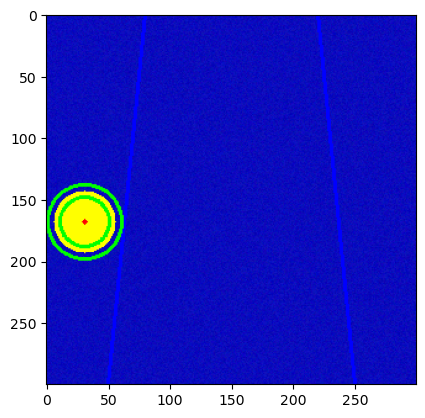

In [157]:
allClassify(x1, x2, x, y, rad_start, rad_end, rad, img_path)

## 大量のデータを処理

In [ ]:
data_path = 'dataset'